**Name** - Ayush Srivastav

**Topic** - Brain tumor detection using machine learning



## Importing Libraries

In [1]:
from natsort import natsorted
import numpy as np 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost
import cv2
from collections import OrderedDict
import os

sns.set_style('whitegrid')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import pandas as pd
data=pd.read_csv('./Brain Tumor.csv')
data.head(3)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155


## Scaling the data

In [3]:
scalable=['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']


data[scalable]=StandardScaler().fit_transform(data[scalable])
data.head(3)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713,-1.117857e-168
1,Image2,0,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377,-1.117857e-168
2,Image3,1,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636,-1.117857e-168


## Finding data correlation and distribution

In [4]:
X = data.drop(['Image','Class'],axis=1,inplace=False)
y = data['Class']
y.value_counts()

0    2079
1    1683
Name: Class, dtype: int64

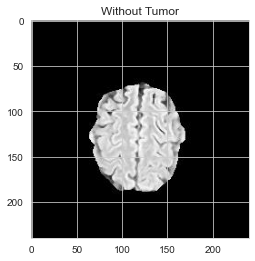

In [5]:
fig = plt.figure()  
folder='./Brain Tumor/Brain Tumor/'
imgs=[os.path.join(folder,img) for img in os.listdir(folder) if img.endswith('.jpg')]
imgs=natsorted(imgs)

img=cv2.imread(imgs[3760])

plt.imshow(img)   
plt.title('Without Tumor')
plt.show()

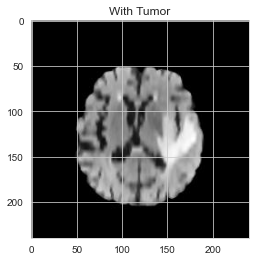

In [6]:
img=cv2.imread(imgs[3])

plt.imshow(img, cmap ='gray')   
plt.title('With Tumor')
plt.show()

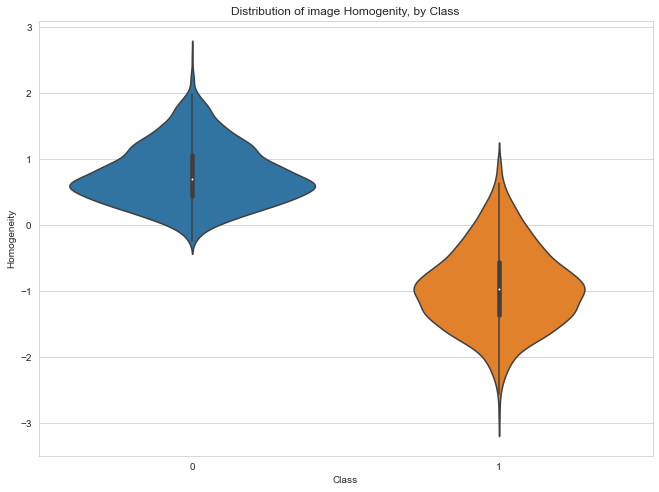

In [7]:
plt.figure(figsize=(11,8))
sns.violinplot(x=y, y= data['Homogeneity'])
plt.title("Distribution of image Homogenity, by Class")
plt.show()

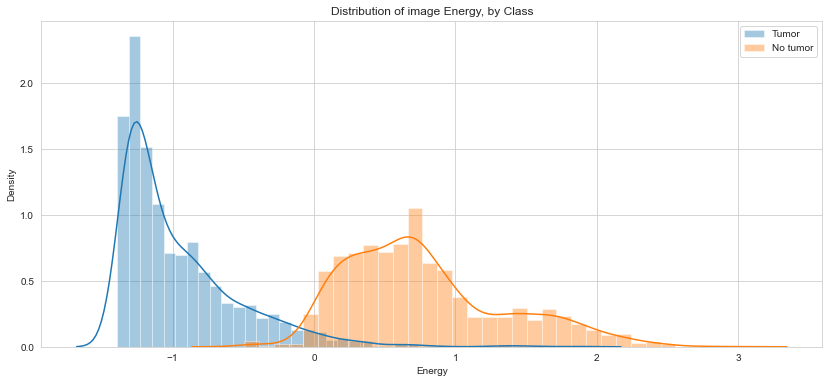

In [8]:
plt.figure(figsize=(14,6))
class1=data['Class']== 1
class0=data['Class']== 0
_data=data.copy()
_data=data.drop('Image',axis=1,inplace=False)
sns.distplot(a= _data[class1]['Energy'], label="Tumor")
sns.distplot(a = _data[class0]['Energy'], label="No tumor" )

plt.title("Distribution of image Energy, by Class")
plt.legend()
plt.show()

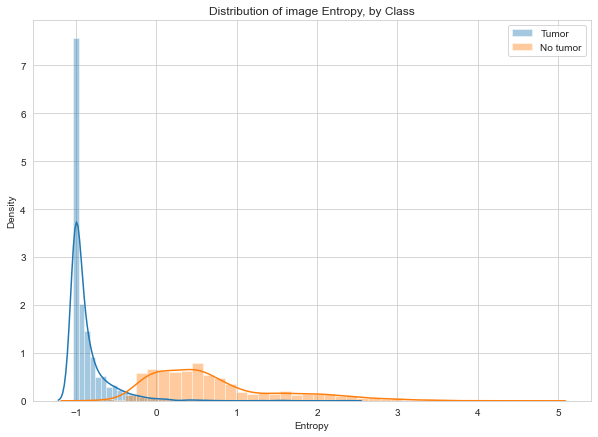

In [9]:
plt.figure(figsize=(10,7))
sns.distplot(a= _data[class1]['Entropy'], label="Tumor")
sns.distplot(a = _data[class0]['Entropy'], label="No tumor" )
plt.title("Distribution of image Entropy, by Class")
plt.legend()
plt.show()

## Training

In [13]:
# Using Extreme Gradient Boost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(X_train ,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
model.score(X_test, y_test)

0.9497170630035161

## Create UI using anvil